In [1]:
%load_ext autoreload
%autoreload 2

import os 
os.chdir("..")

from numerics.utilities.misc import * 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from numerics.integration.matrices import *
from numerics.machine_learning.models import * 

In [28]:
params, exp_path = def_params()
total_time = 100.
dt = 1e-4
states_si, dys_si = load(itraj=1, exp_path=exp_path, total_time=total_time, dt=dt, ext_signal=1)
#tfsignals = tf.convert_to_tensor(dys_si.astype(np.float32)[tf.newaxis])
times = get_time(total_time,dt).astype(np.float32)
dd = tf.unstack(dys_si.astype(np.float32),axis=1)

tfsignals = tf.stack([times[:-1],dd[0], dd[1]])
tfsignals = tf.transpose(tfsignals)[tf.newaxis]

multipdt = int(1e0)
tfsignals = tfsignals[:,::multipdt,:]
tfsignals = tfsignals[:,0:int(1e4),:]


A, D , E, B  = genoni_matrices(*params)
xicov, covss = genoni_xi_cov(A,D, E, B ,params, stat=True)

initial_parameters = np.array([9.5, 2*np.pi/10]).astype(np.float32)
true_parameters = np.array([10., 2*np.pi/10]).astype(np.float32)

In [31]:
BS = 1
model = Model(params=params, dt=multipdt*dt, initial_parameters=initial_parameters, true_parameters=true_parameters, cov_in=covss, batch_size=(BS,None,2))
model.recurrent_layer.build(tf.TensorShape([1,None,3]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))

In [32]:
history = model.fit(x=tfsignals, y=tfsignals, epochs=50, batch_size=1, shuffle=False,)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0111 - PARAMS: 5.0691 - GRADS: -1.3177e-04
Epoch 2/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0137 - PARAMS: 5.0671 - GRADS: 2.8854e-04
Epoch 3/50
1/1 [==============================] - 1s 975ms/step - LOSS: 1.0217 - PARAMS: 5.0636 - GRADS: 5.7029e-04
Epoch 4/50
1/1 [==============================] - 1s 939ms/step - LOSS: 1.0299 - PARAMS: 5.0595 - GRADS: 7.5875e-04
Epoch 5/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0367 - PARAMS: 5.0551 - GRADS: 8.8457e-04
Epoch 6/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0417 - PARAMS: 5.0505 - GRADS: 9.6834e-04
Epoch 7/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0453 - PARAMS: 5.0458 - GRADS: 0.0010
Epoch 8/50
1/1 [==============================] - 1s 1s/step - LOSS: 1.0478 - PARAMS: 5.0409 - GRADS: 0.0011
Epoch 9/50
1/1 [==============================] - 1s 946ms/step - LOSS: 1.0495 - PARAMS: 5.0360 -

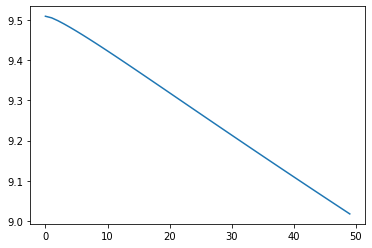

In [33]:
plt.plot(np.squeeze(history.history["PARAMS"])[:,0])

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF
